In [ ]:
# 小麦とチェス盤問題

# 今回の課題：8×8マスのチェス盤の上に小麦の数を1,2,4と順番に置いていくと、最終的な小麦の数はどうなるかという問題

In [2]:
# 必要なライブラリのインポート
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import timeit

In [3]:
# 問題1:2×2マスのチェス盤の小麦の数

# n_squaresをチェス盤のマスの合計数とする。
n_squares = 4
small_board_list = [1]

# small_board_listに最後の要素に2をかけたものを加えていく。
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

# small_board_ndarrayを行列化する。
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

square_size = (2, 2)
small_board_ndarray = small_board_ndarray.reshape(square_size)
print("2×2マスのチェス盤：\n{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]
2×2マスのチェス盤：
[[1 2]
 [4 8]]


In [4]:
# 問題2:n×mマスへの拡張

# chess_boardを小麦とチェス盤の逸話の計算を行う関数として定義
def chess_board(square_size=(8, 8)):

    n_squares = square_size[0]*square_size[1]
    board_list = [1]
    for _ in range(n_squares - 1):
        board_list.append(2*board_list[-1])
    board_ndarray = np.array(board_list).reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

np.set_printoptions(precision=1) 
print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[1.0e+00 2.0e+00 4.0e+00 8.0e+00 1.6e+01 3.2e+01 6.4e+01 1.3e+02]
 [2.6e+02 5.1e+02 1.0e+03 2.0e+03 4.1e+03 8.2e+03 1.6e+04 3.3e+04]
 [6.6e+04 1.3e+05 2.6e+05 5.2e+05 1.0e+06 2.1e+06 4.2e+06 8.4e+06]
 [1.7e+07 3.4e+07 6.7e+07 1.3e+08 2.7e+08 5.4e+08 1.1e+09 2.1e+09]
 [4.3e+09 8.6e+09 1.7e+10 3.4e+10 6.9e+10 1.4e+11 2.7e+11 5.5e+11]
 [1.1e+12 2.2e+12 4.4e+12 8.8e+12 1.8e+13 3.5e+13 7.0e+13 1.4e+14]
 [2.8e+14 5.6e+14 1.1e+15 2.3e+15 4.5e+15 9.0e+15 1.8e+16 3.6e+16]
 [7.2e+16 1.4e+17 2.9e+17 5.8e+17 1.2e+18 2.3e+18 4.6e+18 9.2e+18]]


(8, 8)マスのチェス盤の小麦の合計：1.8e+19


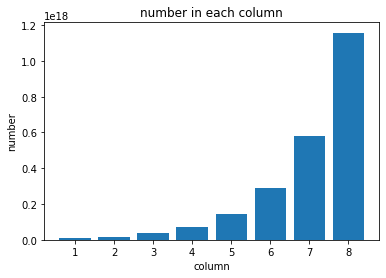

In [5]:
# 問題3:小麦の数の合計

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

sum_board = board_ndarray.sum()
mean_board_columns = board_ndarray.mean(axis=0)

print("{}マスのチェス盤の小麦の合計：{:.1e}".format(square_size, sum_board))

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), mean_board_columns)
plt.show()

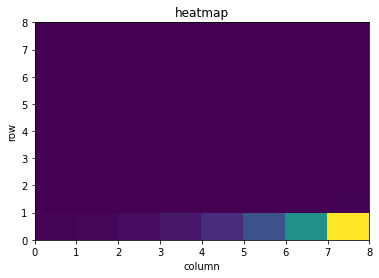

In [6]:
# 問題4:小麦の数のヒートマップ

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
# [::-1]でboard_ndarrayの上下を反転
plt.pcolor(board_ndarray[::-1]) # スライシングで上下を反転させた
plt.show()

In [7]:
# 問題5:後半は前半の何倍か

square_size = (8, 8)
board_ndarray = chess_board(square_size=square_size)

first_half = board_ndarray[:4, :].sum()
second_half = board_ndarray[4:, :].sum()

rate = second_half/first_half

print("後半は前半の{}倍".format(rate))

後半は前半の4294967296.0倍


In [8]:
# 問題６:他の計算方法によるn×mマスへの拡張

# chess_board_with_npappendを小麦とチェス盤の逸話の計算を行う関数として定義
def chess_board_with_npappend(square_size=(8, 8)):
    n_squares = square_size[0]*square_size[1]
    board_ndarray = np.array([1]).astype(np.uint64)
    times = np.array([2]).astype(np.uint64)
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, times*board_ndarray[-1])
    board_ndarray = board_ndarray.reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board_with_npappend(square_size=square_size)

print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     

In [15]:
# 問題６:他の計算方法によるn×mマスへの拡張(2)

# chess_board_with_broadcastを小麦とチェス盤の逸話の計算を行う関数として定義
def chess_board_with_broadcast(square_size=(8, 8)):
    n_squares = square_size[0]*square_size[1]
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    board_ndarray = 2**indices_of_squares
    board_ndarray = board_ndarray.reshape(square_size)
    return board_ndarray

square_size = (8, 8)
board_ndarray = chess_board_with_broadcast(square_size=square_size)

print("{}マスのチェス盤：\n{}".format(square_size, board_ndarray))

(8, 8)マスのチェス盤：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     

In [13]:
%%timeit

# 問題7:計算時間の比較(1)
board_ndarray = chess_board(square_size=square_size)

8.46 µs ± 77 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [14]:
%%timeit

# 問題7:計算時間の比較(2)
board_ndarray = chess_board_with_npappend(square_size=square_size)

168 µs ± 7.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [16]:
%%timeit

# 問題7:計算時間の比較(3)
board_ndarray = chess_board_with_broadcast(square_size=square_size)

2.06 µs ± 22 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
